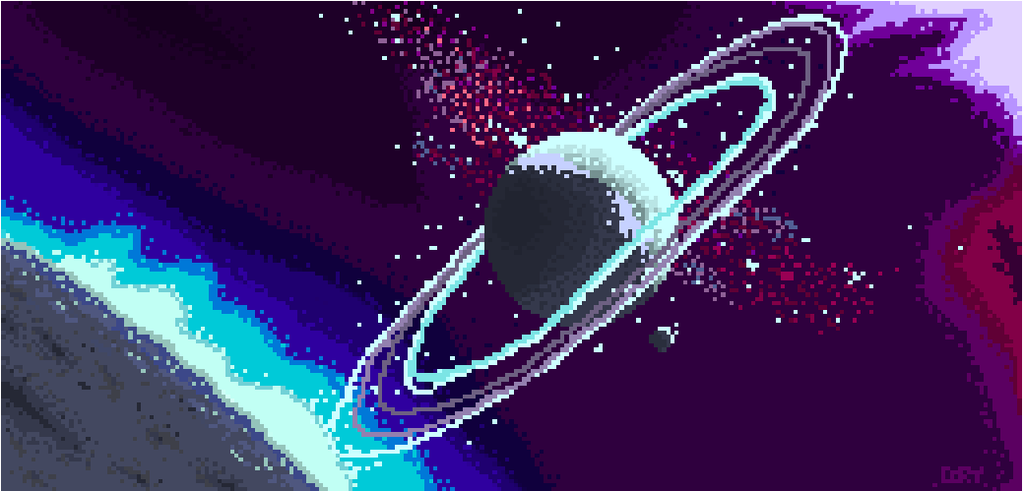

# Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scipy as sp
import statsmodels
import random as rd
import math
import statsmodels.api as sm
import seaborn as sns

!pip install pingouin
import pingouin as pg

!pip install scikit-gof
from skgof import ad_test, ks_test

!pip install openpyxl
import openpyxl
import itertools
from copy import copy, deepcopy


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 215kB 4.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-cp37-none-any.whl size=204754 sha256=38236aef8a26b2969c8065bb78831c3a87d7ad256def6550e32e4f2abfe8ed79
  Stored in directory: /root/.cache/pip/wheels/d6/36/7e/ae23fc9845091efd9228b36f93b306a67c40bdc2195b280748
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7050 sha256=a0cc39e29238d2b78079f209445747b909e013af027f93c0f42d1dc2ff5ebc22
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils
  Created wheel for scikit-gof: filename=scikit_gof-0.1.3-cp37-none-any.whl size=12014 sha256=334c2ec5afb840f14589bc3e3d89d46a4070bbdda8ad0dcdf4f79a4a03d3fcfc
  Stored in directory: /root/.cache/pip/wheels/9b/5a/a9/879f120407e0fc948df181588ac398c01a376be97f4e5db446
Successfully built scikit-gof


/usr/local/lib/python3.7/dist-packages/skgof/ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


# Вводим данные исследования

In [2]:
wb = openpyxl.load_workbook('students.xlsx')
sheet = wb.active

names = []
sex = []
year_study = []
ojectivity = []
intelligence_lvl = []
erudition_lvl = []
height_lvl = []
weight_lvl = []
beauty_lvl = []

for cell in sheet['B']:
    names.append(cell.value)
names = names[1:]

# 1 - Ж
# 0 - М
for cell in sheet['C']:
  if cell.value == 'Ж':
    sex.append(1)
  if cell.value == 'М':
    sex.append(0)

for cell in sheet['D']:
    year_study.append(cell.value)
year_study = year_study[1:]

for cell in sheet['I']:
    ojectivity.append(cell.value)
ojectivity = ojectivity[1:]

for cell in sheet['K']:
        intelligence_lvl.append(cell.value)
intelligence_lvl = intelligence_lvl[1:]

for cell in sheet['M']:
        erudition_lvl.append(cell.value)
erudition_lvl = erudition_lvl[1:]

for cell in sheet['O']:
        height_lvl.append(cell.value)
height_lvl = height_lvl[1:]

for cell in sheet['R']:
        weight_lvl.append(cell.value)
weight_lvl = weight_lvl[1:]

for cell in sheet['U']:
        beauty_lvl.append(cell.value)
beauty_lvl = beauty_lvl[1:]

df_main = pd.DataFrame({'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print(df_main)

    sex  year_study  ojectivity  ...  height_lvl  weight_lvl  beauty_lvl
0     1           3     0.70000  ...        0.80        0.70        0.85
1     0           3     0.85000  ...        0.80        0.70        0.50
2     1           1     0.70000  ...        0.40        0.60        0.50
3     1           1     0.30000  ...        0.26        0.50        0.50
4     0           2     0.73241  ...        0.50        0.50        0.75
..  ...         ...         ...  ...         ...         ...         ...
61    0           3     0.80000  ...        0.50        0.05        0.20
62    0           2     0.60000  ...        0.50        0.50        0.70
63    0           2     0.80000  ...        0.50        0.80        0.80
64    0           3     0.60000  ...        0.60        0.70        0.40
65    0           2     1.00000  ...        0.50        0.50        0.80

[66 rows x 8 columns]


#  Задача
# Спрогнозировать каждый из видов ответов на основе остальных. Категориальные предикторы, принимающие больше 3 значений можно сделать бинарными переменными "первая модель/не первая", "вторая/не вторая" и т.д.)

# Спрогнозируем каждый параметр от всех возможных регрессоров


In [3]:
for i in range(8):
  REG = df_main.iloc[:, [j for j in range(8) if j!= i]] 
  REG = sm.add_constant(REG) 
  DEP = df_main.iloc[:,i] 
  model = sm.OLS(DEP,REG) 
  results = model.fit() 
  y_pred_1 = results.predict(REG) 
  print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    sex   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.115
Date:                Mon, 28 Jun 2021   Prob (F-statistic):            0.00737
Time:                        15:06:42   Log-Likelihood:                -32.691
No. Observations:                  66   AIC:                             81.38
Df Residuals:                      58   BIC:                             98.90
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4755      0.282  

# Получим более точные оценки, убрав ненужные предикторы

Попытаемся точнее спрогнозировать пол

In [4]:
REG = df_main.iloc[:, [1, 2, 3, 5, 7]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,0]
model = sm.OLS(DEP,REG)
results_sex = model.fit()
y_pred_1_sex = results_sex.predict(REG) 
print(results_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                    sex   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.499
Date:                Mon, 28 Jun 2021   Prob (F-statistic):            0.00151
Time:                        15:06:42   Log-Likelihood:                -32.715
No. Observations:                  66   AIC:                             77.43
Df Residuals:                      60   BIC:                             90.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4674      0.237  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


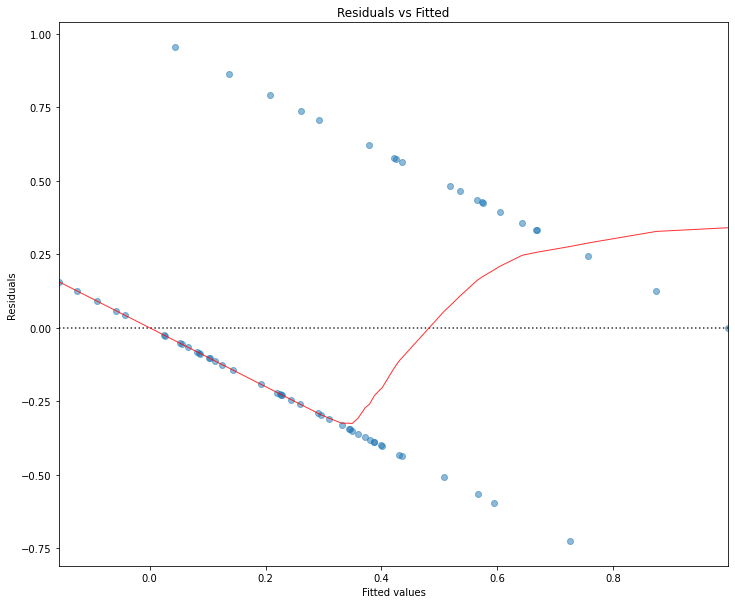

In [5]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_sex, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

Попытаемся точнее спрогнозировать год обучения

In [6]:
REG = df_main.iloc[:, [0, 2, 3, 5]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,1]
model = sm.OLS(DEP,REG)
results_year_study = model.fit()
y_pred_1_year_study = results_year_study.predict(REG) 
print(results_year_study.summary())

                            OLS Regression Results                            
Dep. Variable:             year_study   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.782
Date:                Mon, 28 Jun 2021   Prob (F-statistic):             0.0344
Time:                        15:06:42   Log-Likelihood:                -75.470
No. Observations:                  66   AIC:                             160.9
Df Residuals:                      61   BIC:                             171.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0716      0.378  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


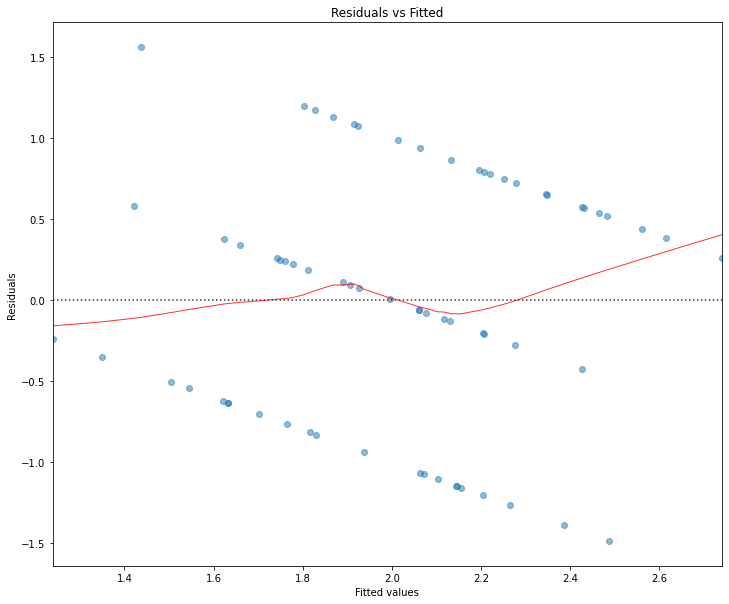

In [7]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_year_study, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

Попытаемся точнее спрогнозировать обьективность

In [8]:
REG = df_main.iloc[:, [0, 1, 3, 7]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,2]
model = sm.OLS(DEP,REG)
results_ojectivity = model.fit()
y_pred_1_ojectivity = results_ojectivity.predict(REG) 
print(results_ojectivity.summary())

                            OLS Regression Results                            
Dep. Variable:             ojectivity   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     15.57
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.83e-09
Time:                        15:06:42   Log-Likelihood:                 30.549
No. Observations:                  66   AIC:                            -51.10
Df Residuals:                      61   BIC:                            -40.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3492      0.079  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


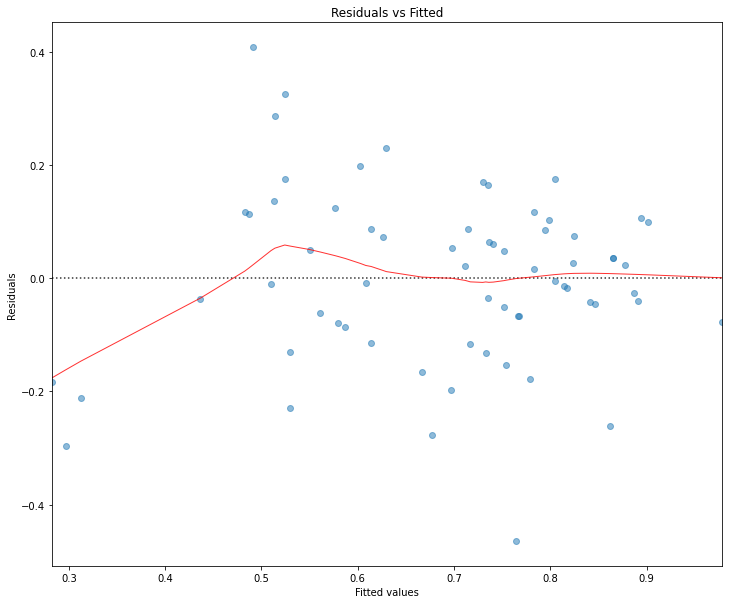

In [9]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_ojectivity, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


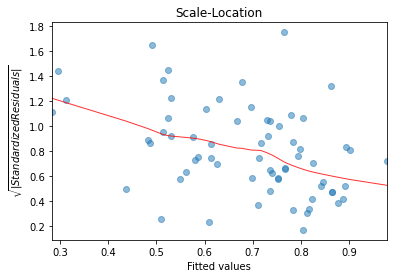

In [10]:
model_norm_residuals = results_ojectivity.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_ojectivity, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_ojectivity, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Попытаемся точнее спрогнозировать интелект


In [11]:
REG = df_main.iloc[:, [0, 1, 2, 5, 7]]
DEP = df_main.iloc[:,3]
model = sm.OLS(DEP,REG)
results_intelligence_lvl = model.fit()
y_pred_1_intelligence_lvl = results_intelligence_lvl.predict(REG) 
print(results_intelligence_lvl.summary()) 

                                 OLS Regression Results                                
Dep. Variable:       intelligence_lvl   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              214.3
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    2.51e-37
Time:                        15:06:43   Log-Likelihood:                          29.677
No. Observations:                  66   AIC:                                     -49.35
Df Residuals:                      61   BIC:                                     -38.41
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


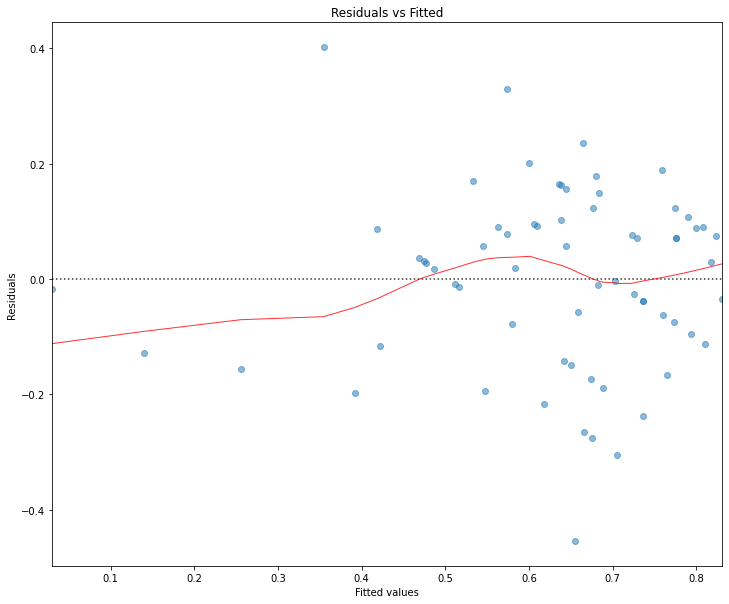

In [12]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_intelligence_lvl, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


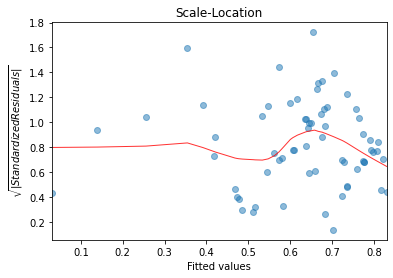

In [13]:
model_norm_residuals = results_intelligence_lvl.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_intelligence_lvl, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_intelligence_lvl, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Попытаемся точнее спрогнозировать эрудицию

In [14]:
REG = df_main.iloc[:, [7]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,4]
model = sm.OLS(DEP,REG)
results_erudition_lvl = model.fit()
y_pred_1_erudition_lvl = results_erudition_lvl.predict(REG) 
print(results_erudition_lvl.summary())

                            OLS Regression Results                            
Dep. Variable:          erudition_lvl   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     13.57
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           0.000474
Time:                        15:06:44   Log-Likelihood:                 15.413
No. Observations:                  66   AIC:                            -26.83
Df Residuals:                      64   BIC:                            -22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3882      0.061      6.399      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


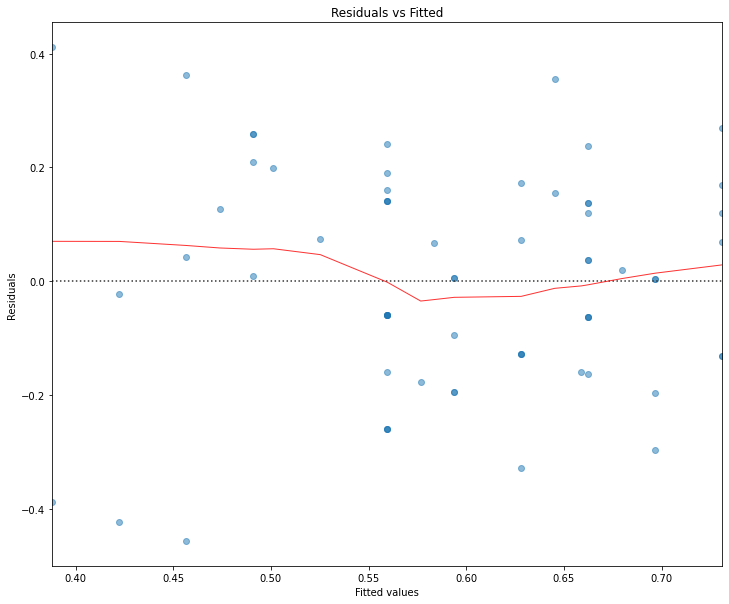

In [15]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_erudition_lvl, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


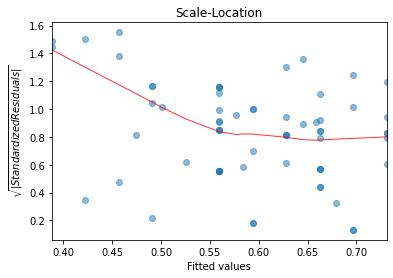

In [16]:
model_norm_residuals = results_erudition_lvl.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_erudition_lvl, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_erudition_lvl, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Попытаемся точнее спрогнозировать рост

In [17]:
REG = df_main.iloc[:, [0, 1, 3, 6, 7]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,5]
model = sm.OLS(DEP,REG)
results_height_lvl = model.fit()
y_pred_1_height_lvl = results_height_lvl.predict(REG) 
print(results_height_lvl.summary())

                            OLS Regression Results                            
Dep. Variable:             height_lvl   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5.782
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           0.000202
Time:                        15:06:44   Log-Likelihood:                 7.4187
No. Observations:                  66   AIC:                            -2.837
Df Residuals:                      60   BIC:                             10.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3413      0.121  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


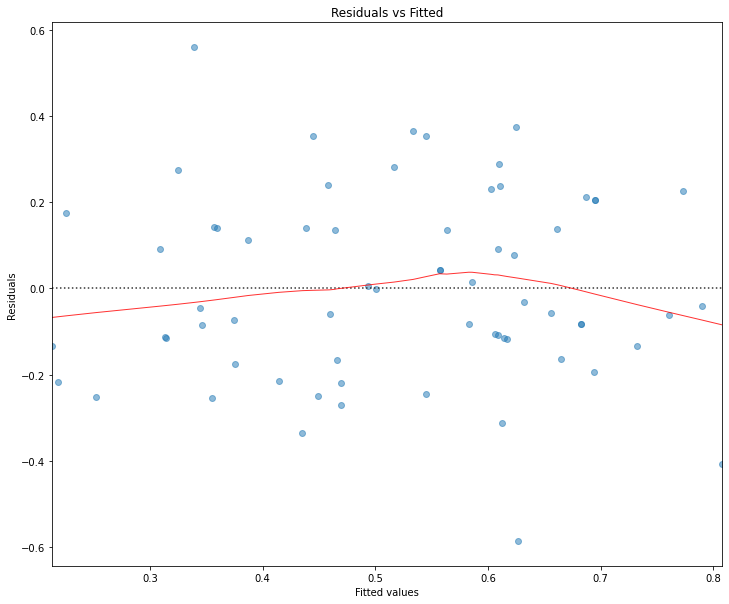

In [18]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_height_lvl, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


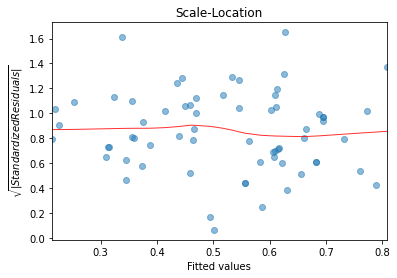

In [19]:
model_norm_residuals = results_height_lvl.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_height_lvl, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_height_lvl, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Попытаемся точнее спрогнозировать вес

In [20]:
REG = df_main.iloc[:, [5, 7]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,6]
model = sm.OLS(DEP,REG)
results_weight_lvl = model.fit()
y_pred_1_weight_lvl = results_weight_lvl.predict(REG) 
print(results_weight_lvl.summary())

                            OLS Regression Results                            
Dep. Variable:             weight_lvl   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6.088
Date:                Mon, 28 Jun 2021   Prob (F-statistic):            0.00383
Time:                        15:06:45   Log-Likelihood:                -5.9370
No. Observations:                  66   AIC:                             17.87
Df Residuals:                      63   BIC:                             24.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5458      0.103      5.280      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


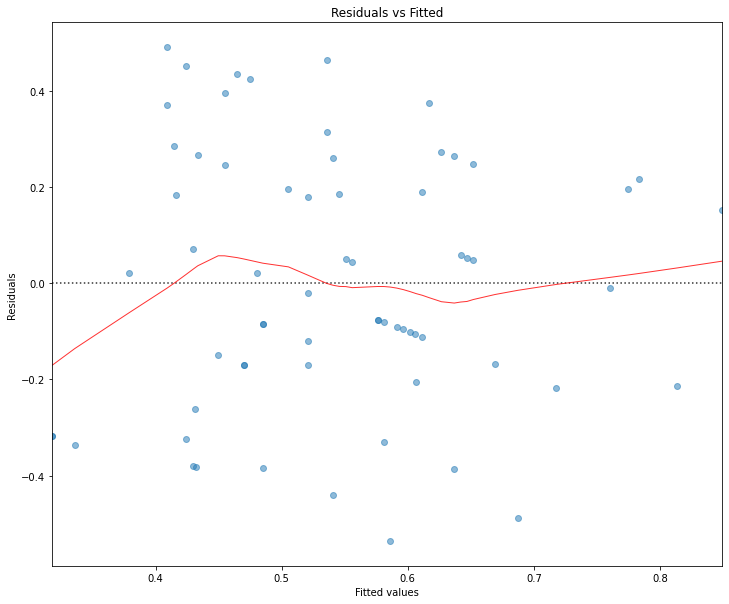

In [21]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_weight_lvl, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


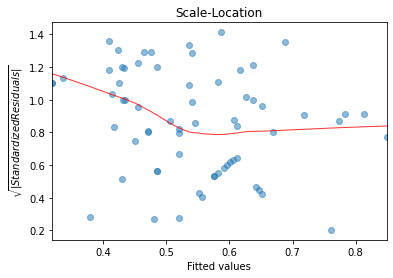

In [22]:
model_norm_residuals = results_weight_lvl.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_weight_lvl, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_weight_lvl, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Попытаемся точнее спрогнозировать красоту

In [23]:
REG = df_main.iloc[:, [0, 2, 3, 4, 5, 6]]
REG = sm.add_constant(REG) 
DEP = df_main.iloc[:,7]
model = sm.OLS(DEP,REG)
results_beauty_lvl = model.fit()
y_pred_1_beauty_lvl = results_beauty_lvl.predict(REG) 
print(results_beauty_lvl.summary())

                            OLS Regression Results                            
Dep. Variable:             beauty_lvl   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     7.961
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.63e-06
Time:                        15:06:45   Log-Likelihood:                 15.495
No. Observations:                  66   AIC:                            -16.99
Df Residuals:                      59   BIC:                            -1.663
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1444      0.121  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


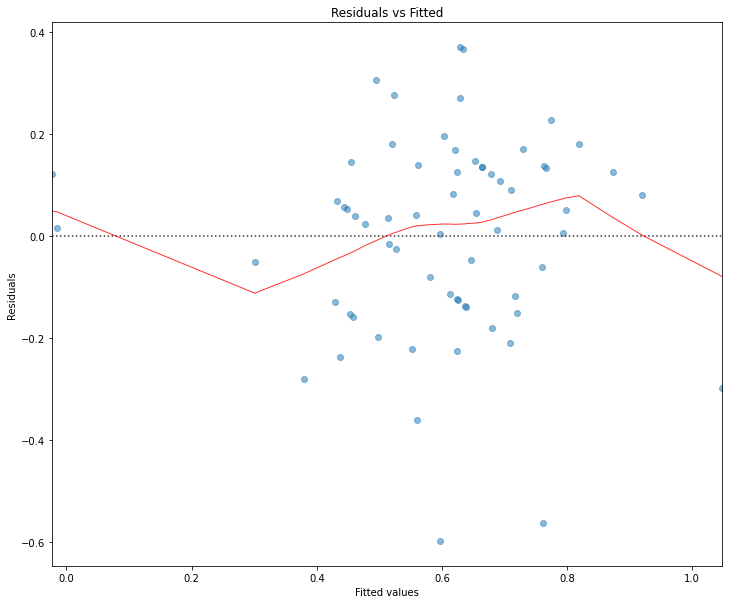

In [24]:
plot_RF = plt.figure(figsize=(12, 10))
plot_RF.axes[0] = sns.residplot(y_pred_1_beauty_lvl, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


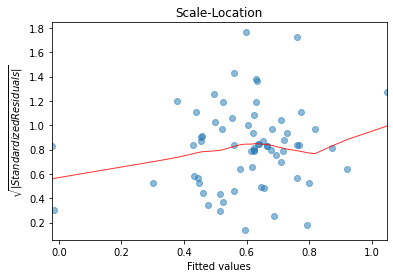

In [25]:
model_norm_residuals = results_beauty_lvl.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_1_beauty_lvl, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_1_beauty_lvl, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Используем минимизацию BIC

In [26]:
df_main_BIC = pd.DataFrame({'const':[1 for p in range(len(sex))],'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print([i for i in df_main_BIC])

['const', 'sex', 'year_study', 'ojectivity', 'intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']


In [27]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'sex']
DEP = df_main.iloc[:,0]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)

y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.458
Model:                            OLS   Adj. R-squared (uncentered):              0.441
Method:                 Least Squares   F-statistic:                              27.08
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    3.01e-09
Time:                        15:06:46   Log-Likelihood:                         -35.627
No. Observations:                  66   AIC:                                      75.25
Df Residuals:                      64   BIC:                                      79.63
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


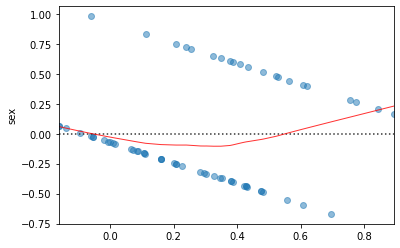

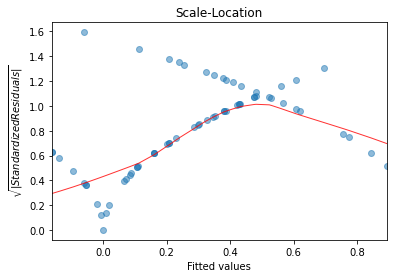

In [28]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [29]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'year_study']
DEP = df_main.iloc[:,1]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     5.524
Date:                Mon, 28 Jun 2021   Prob (F-statistic):             0.0219
Time:                        15:06:47   Log-Likelihood:                -78.268
No. Observations:                  66   AIC:                             160.5
Df Residuals:                      64   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5551      0.219      7.090      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


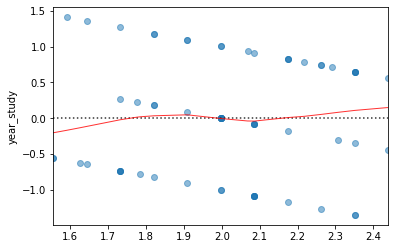

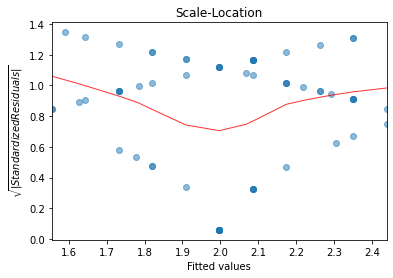

In [30]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [31]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'ojectivity']
DEP = df_main.iloc[:,2]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     28.79
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.32e-09
Time:                        15:06:47   Log-Likelihood:                 28.749
No. Observations:                  66   AIC:                            -51.50
Df Residuals:                      63   BIC:                            -44.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3771      0.075      5.044      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


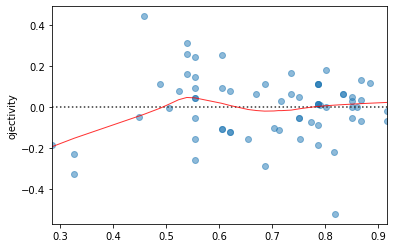

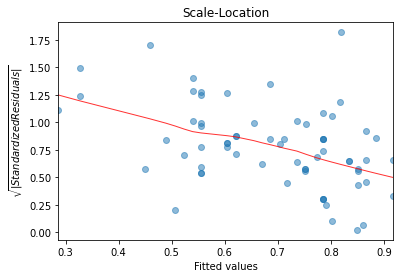

In [32]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [33]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'intelligence_lvl']
DEP = df_main.iloc[:,3]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              354.6
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    2.20e-39
Time:                        15:06:48   Log-Likelihood:                          28.444
No. Observations:                  66   AIC:                                     -50.89
Df Residuals:                      63   BIC:                                     -44.32
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


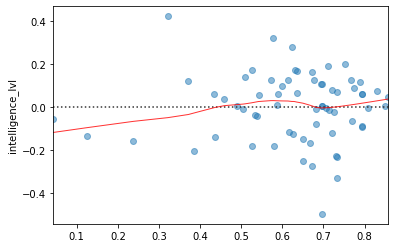

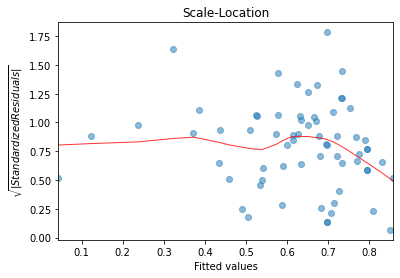

In [34]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [35]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'erudition_lvl']
DEP = df_main.iloc[:,4]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     13.57
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           0.000474
Time:                        15:06:48   Log-Likelihood:                 15.413
No. Observations:                  66   AIC:                            -26.83
Df Residuals:                      64   BIC:                            -22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3882      0.061      6.399      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


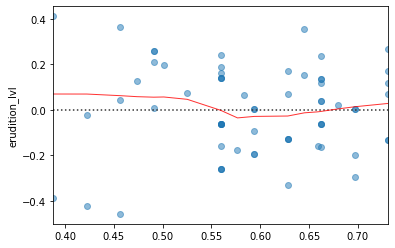

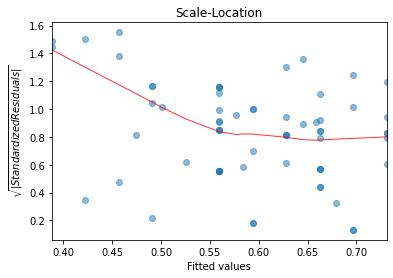

In [36]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [37]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'height_lvl']
DEP = df_main.iloc[:,5]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.618
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           0.000205
Time:                        15:06:49   Log-Likelihood:                 4.7970
No. Observations:                  66   AIC:                            -1.594
Df Residuals:                      62   BIC:                             7.165
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4934      0.099      4.989      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


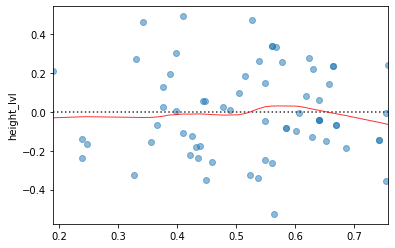

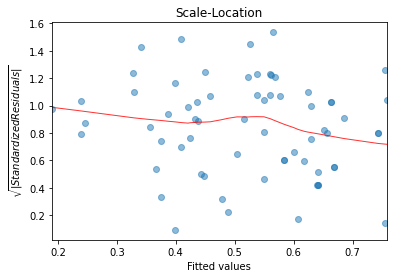

In [38]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [39]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'weight_lvl']
DEP = df_main.iloc[:,6]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6.088
Date:                Mon, 28 Jun 2021   Prob (F-statistic):            0.00383
Time:                        15:06:50   Log-Likelihood:                -5.9370
No. Observations:                  66   AIC:                             17.87
Df Residuals:                      63   BIC:                             24.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5458      0.103      5.280      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


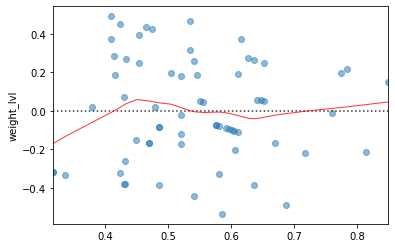

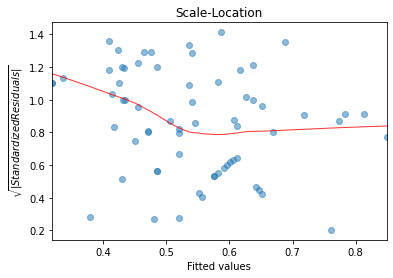

In [40]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [41]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_BIC if i != 'beauty_lvl']
DEP = df_main.iloc[:,7]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)
y_pred_best = results_best.predict(np.array([df_main_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              197.3
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    5.67e-32
Time:                        15:06:50   Log-Likelihood:                          11.844
No. Observations:                  66   AIC:                                     -17.69
Df Residuals:                      63   BIC:                                     -11.12
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


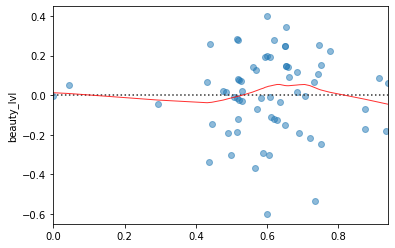

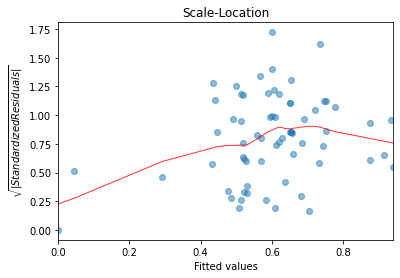

In [42]:
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Пробуем срегрессировать реальный рост и вес людей



In [43]:
height,weight = [],[]

for cell in sheet['N']:
        height.append(cell.value)
height = height[1:]
for cell in sheet['Q']:
        weight.append(cell.value)
weight = weight[1:]

df_main_height = pd.DataFrame({'actual_height':height,'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print(df_main_height)
df_main_weight = pd.DataFrame({'actual_weight':weight,'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print(df_main_weight)

   actual_height  sex  year_study  ...  height_lvl  weight_lvl  beauty_lvl
0            164    1           3  ...        0.80        0.70        0.85
1            185    0           3  ...        0.80        0.70        0.50
2            170    1           1  ...        0.40        0.60        0.50
3           1.52    1           1  ...        0.26        0.50        0.50
4            170    0           2  ...        0.50        0.50        0.75
..           ...  ...         ...  ...         ...         ...         ...
61           179    0           3  ...        0.50        0.05        0.20
62           170    0           2  ...        0.50        0.50        0.70
63           172    0           2  ...        0.50        0.80        0.80
64           185    0           3  ...        0.60        0.70        0.40
65           180    0           2  ...        0.50        0.50        0.80

[66 rows x 9 columns]
   actual_weight  sex  year_study  ...  height_lvl  weight_lvl  beauty_lvl
0 

In [44]:
REG = df_main_height.iloc[:, 1:] 
REG = sm.add_constant(REG) 
DEP = df_main_height.iloc[:,0] 
model = sm.OLS(DEP,REG) 
results = model.fit() 
y_pred_1 = results.predict(REG) 
print(results.summary())

ValueError: ignored

In [ ]:
REG = df_main_height.iloc[:, [1,4,5,6,7]] 
REG = sm.add_constant(REG) 
DEP = df_main_height.iloc[:,0] 
model = sm.OLS(DEP,REG) 
results = model.fit() 
y_pred_1 = results.predict(REG) 
print(results.summary())

In [ ]:
REG = df_main_weight.iloc[:, 1:] 
REG = sm.add_constant(REG) 
DEP = df_main_weight.iloc[:,0] 
model = sm.OLS(DEP,REG) 
results = model.fit() 
y_pred_1 = results.predict(REG) 
print(results.summary())

In [ ]:
REG = df_main_weight.iloc[:, [1,2,4,5,6,7]] 
REG = sm.add_constant(REG) 
DEP = df_main_weight.iloc[:,0] 
model = sm.OLS(DEP,REG) 
results = model.fit() 
y_pred_1 = results.predict(REG) 
print(results.summary())

# Применим минимизацию BIC для регрессии роста и веса

In [ ]:
df_main_height_BIC = pd.DataFrame({'const':[1 for p in range(len(sex))],'actual_height':height,'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
df_main_weight_BIC = pd.DataFrame({'const':[1 for p in range(len(sex))],'actual_weight':weight,'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})

In [ ]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_height_BIC if i != 'actual_height']
DEP = df_main_height_BIC.iloc[:,1]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_height_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)

y_pred_best = results_best.predict(np.array([df_main_height_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

In [ ]:
plot_RF = plt.figure()
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [ ]:
best_bic = 10000
best_subset_bic = []
stuff = [i for i in df_main_weight_BIC if i != 'actual_weight']
DEP = df_main_weight_BIC.iloc[:,1]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        REG_temp = np.array([df_main_weight_BIC[i] for i in np.array(subset)])
        DEP_temp = np.array(DEP)
        if len(REG_temp) == 0:
          continue
        fit_1 = sm.OLS(DEP_temp, REG_temp.T)
        results = fit_1.fit()
        #print(results.rsquared)
        if results.bic < best_bic:
          results_best = results
          best_bic = deepcopy(results.bic)
          best_subset_bic = deepcopy(subset)
          #print(best_bic)

y_pred_best = results_best.predict(np.array([df_main_weight_BIC[i] for i in np.array(best_subset_bic)]).T)
print(results_best.summary())
print(best_subset_bic)

In [ ]:
plot_RF = plt.figure()
plot_RF.axes[0] = sns.residplot(y_pred_best, DEP,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_RF.axes[0].set_title('Residuals vs Fitted')
plot_RF.axes[0].set_xlabel('Fitted values')
plot_RF.axes[0].set_ylabel('Residuals');
model_norm_residuals = results_best.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_SL = plt.figure()
plt.scatter(y_pred_best, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(y_pred_best, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_SL.axes[0].set_title('Scale-Location')
plot_SL.axes[0].set_xlabel('Fitted values')
plot_SL.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Логистическая регрессия для предсказания пола

In [48]:
REG = df_main.iloc[:, [1,2,3,4,5,6,7]]
REG = sm.add_constant(REG)
DEP = df_main.iloc[:,0]
logit_mod = sm.Logit(DEP,REG)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.471673
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    sex   No. Observations:                   66
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                  0.2459
Time:                        15:31:14   Log-Likelihood:                -31.130
converged:                       True   LL-Null:                       -41.282
Covariance Type:            nonrobust   LLR p-value:                  0.004949
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0408      1.637     -0.025      0.980      -3.250       3.168
year_study 

In [49]:
REG = df_main.iloc[:, [5,7]]
#REG = sm.add_constant(REG)
DEP = df_main.iloc[:,0]
logit_mod = sm.Logit(DEP,REG)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.497844
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    sex   No. Observations:                   66
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                  0.2041
Time:                        15:31:17   Log-Likelihood:                -32.858
converged:                       True   LL-Null:                       -41.282
Covariance Type:            nonrobust   LLR p-value:                 4.047e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
height_lvl    -4.7452      1.267     -3.746      0.000      -7.228      -2.263
beauty_lvl     2.6457      0.